<a href="https://colab.research.google.com/github/finfrierson/data-science-fundamentals/blob/main/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

Not really. It is best used as a tool to compare multiple models, and be able to determine which one is best, and by how much. With a singular model, the information given is not very relevant, as the score does not have a very meaningful impact when seen alone.

**Task2**:

Describe overfitting, in the context of this course

Overfitting can happen when you fit your model too close to the data. One way this can happen when you use too many predictors or too many relationships between predictors.

**Task3**:

How do we mitigate overfitting?

Using less predictors, and having weaker or regulizing priors can help, as it will make the model less of a direct fit to the data.

**Task4**:

How do we mitigate underfitting?

A good way of mitigating underfitting is through comparing multiple accurate models with a tool like elpd_loo to determine which is the best model, that way you know yoyur mdel is good enough of a fit.

**Task5**:

Why would we want more than one predictor in a model?

Sometimes multiple things can have a very direct influence over the expected value of a variable. More predictors allows you to account for more of these, and thus have a more accurate model.

**Task6**:

Can we have too many predictors? How would we now?

Yes, when you start having too many predictors you will overfit your model. You would know your model has too many predictors when you are adding in variables with little impact on the model, because it makes your model more cluttered.Additionally the change in elpd_loo wil be decreasing compared to when you added the previous variable.

**Task7**:

What is variable selection, and how does it work?

Variable selection is when you decide which variables are best to use for a model. There are two main ways we use to do this, first being causal models and second being the elpd_loo. In a causal model you determine the relationships between potentally useable variables and decide what combination would pottentially be most effective. Using elpd_loo you compare a combination of models with different variables to determine which one is determined to be "best". Then using intuition with causal model, the elpd_loo results, and deciding based on number of variables, you can make an informed decision on the best model to use.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

The first option would limit each of the categories to the same slope, whereas in the latter ones they are able to vary and influence eachother. For the latter two, both pick up on that the variable can mean different things for different categories, whch is why both have varying slopes. Essentially, Hierarchial and interactive gives more freedom to fit the category.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

You cant visualize it all in one model. Instead you have multiple models arranged together.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [ ]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-nyy8_lnh
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-nyy8_lnh
  Resolved https://github.com/pydata/xarray.git to commit 5279bd15708e21ea582e56e4f27fc3e9663a8509
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.2.dev1+g5279bd15-py3-none-any.whl size=1241898 sha256=c891f790555071b7b7e7d691d307615ed1b5651ce20da11180feee9429b180af
  Stored in directory: /tmp/pip-ephem-wheel-cache-iats2bcd/wheels/3a/ec/c0/1cda725917279b6beba2a020d6ccddfee2176b25648f4fcad8
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.0
    Uninstalling xarray-2025.1.0:
      Successfully uninstalled xarray-2025.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 4.3 MB/s eta 0:00:00
   ━━

In [ ]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [ ]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [ ]:
bb

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGp,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
5,Grayson Allen,SG,28,PHO,75,74,2513,340,682,0.499,...,48,247,295,227,69,45,95,157,1014,allengr01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,Jalen Wilson,PF,23,BRK,43,3,664,76,179,0.425,...,47,84,131,45,11,4,19,48,214,wilsoja03
563,James Wiseman,C,22,DET,63,6,1091,187,305,0.613,...,110,226,336,54,12,39,66,141,446,wisemja01
565,Christian Wood,PF,28,LAL,50,1,872,123,264,0.466,...,39,215,254,49,16,33,50,72,347,woodch01
566,Delon Wright,PG,31,TOT,47,1,742,74,188,0.394,...,19,67,86,119,54,11,14,32,210,wrighde01


In [ ]:
model_bb = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)
idata_bv = model_bb.fit(idata_kwargs={'log_likelihood': True})
#Whoops typed bv instead of bb. Not worth a rerun lol

Output()

Output()

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

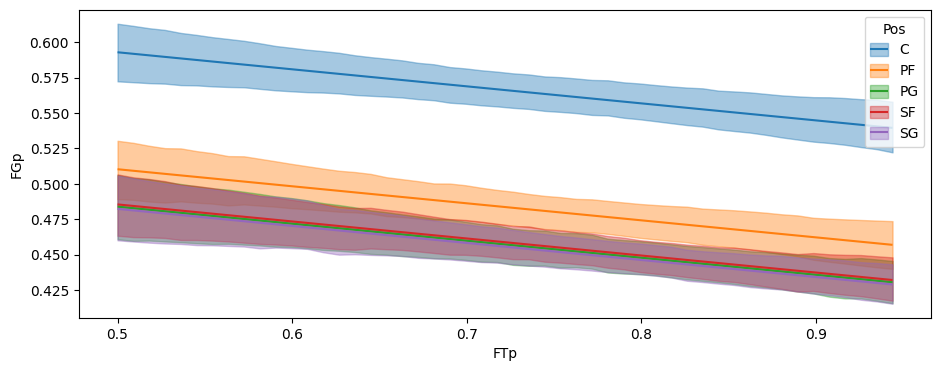

In [ ]:
bmb.interpret.plot_predictions(model_bb,
                               idata_bv,
                                ["FTp",  "Pos"], fig_kwargs={"figsize":(11, 4)})

In [ ]:
model_bb_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
idata_bb_h = model_bb_h.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 75 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

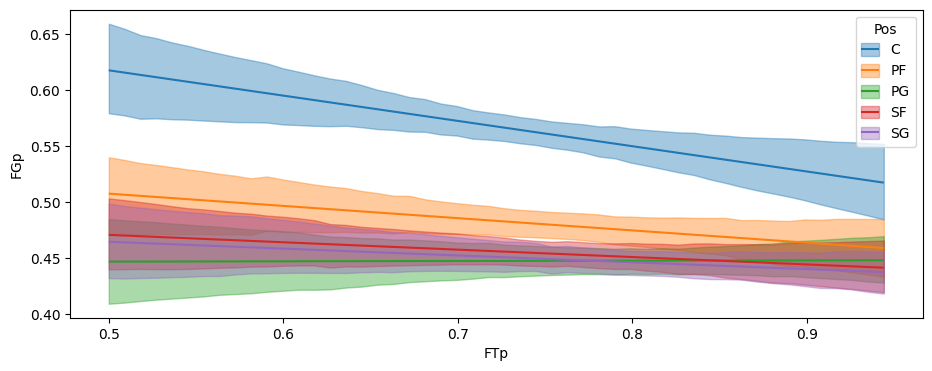

In [ ]:
bmb.interpret.plot_predictions(model_bb_h,
                               idata_bb_h,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

In [ ]:
model_bb_inter1 = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb)
idata_bb_inter1 = model_bb_inter1.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

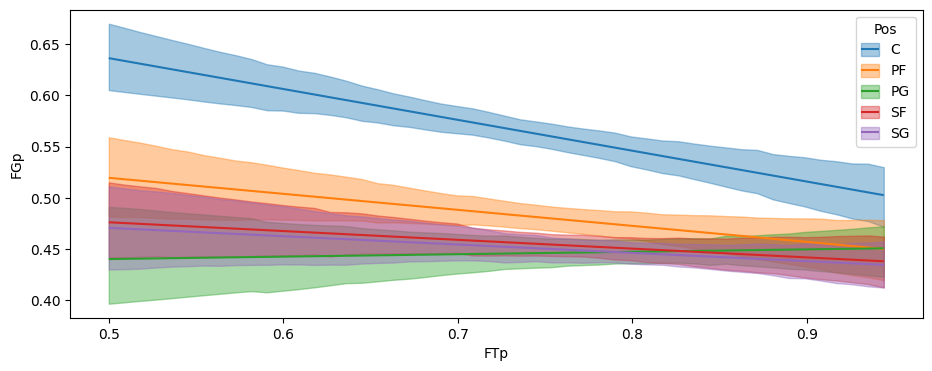

In [ ]:
bmb.interpret.plot_predictions(model_bb_inter1,
                               idata_bb_inter1,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

In [ ]:
model_bb_inter2 = bmb.Model("`FGp` ~ `FTp` + Pos + '3PA' + `FTp`:Pos:'3PA'" , data=bb)
idata_bb_inter2 = model_bb_inter2.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FTp', ylabel='FGp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: xlabel='FTp', ylabel='FGp'>]], dtype=object))

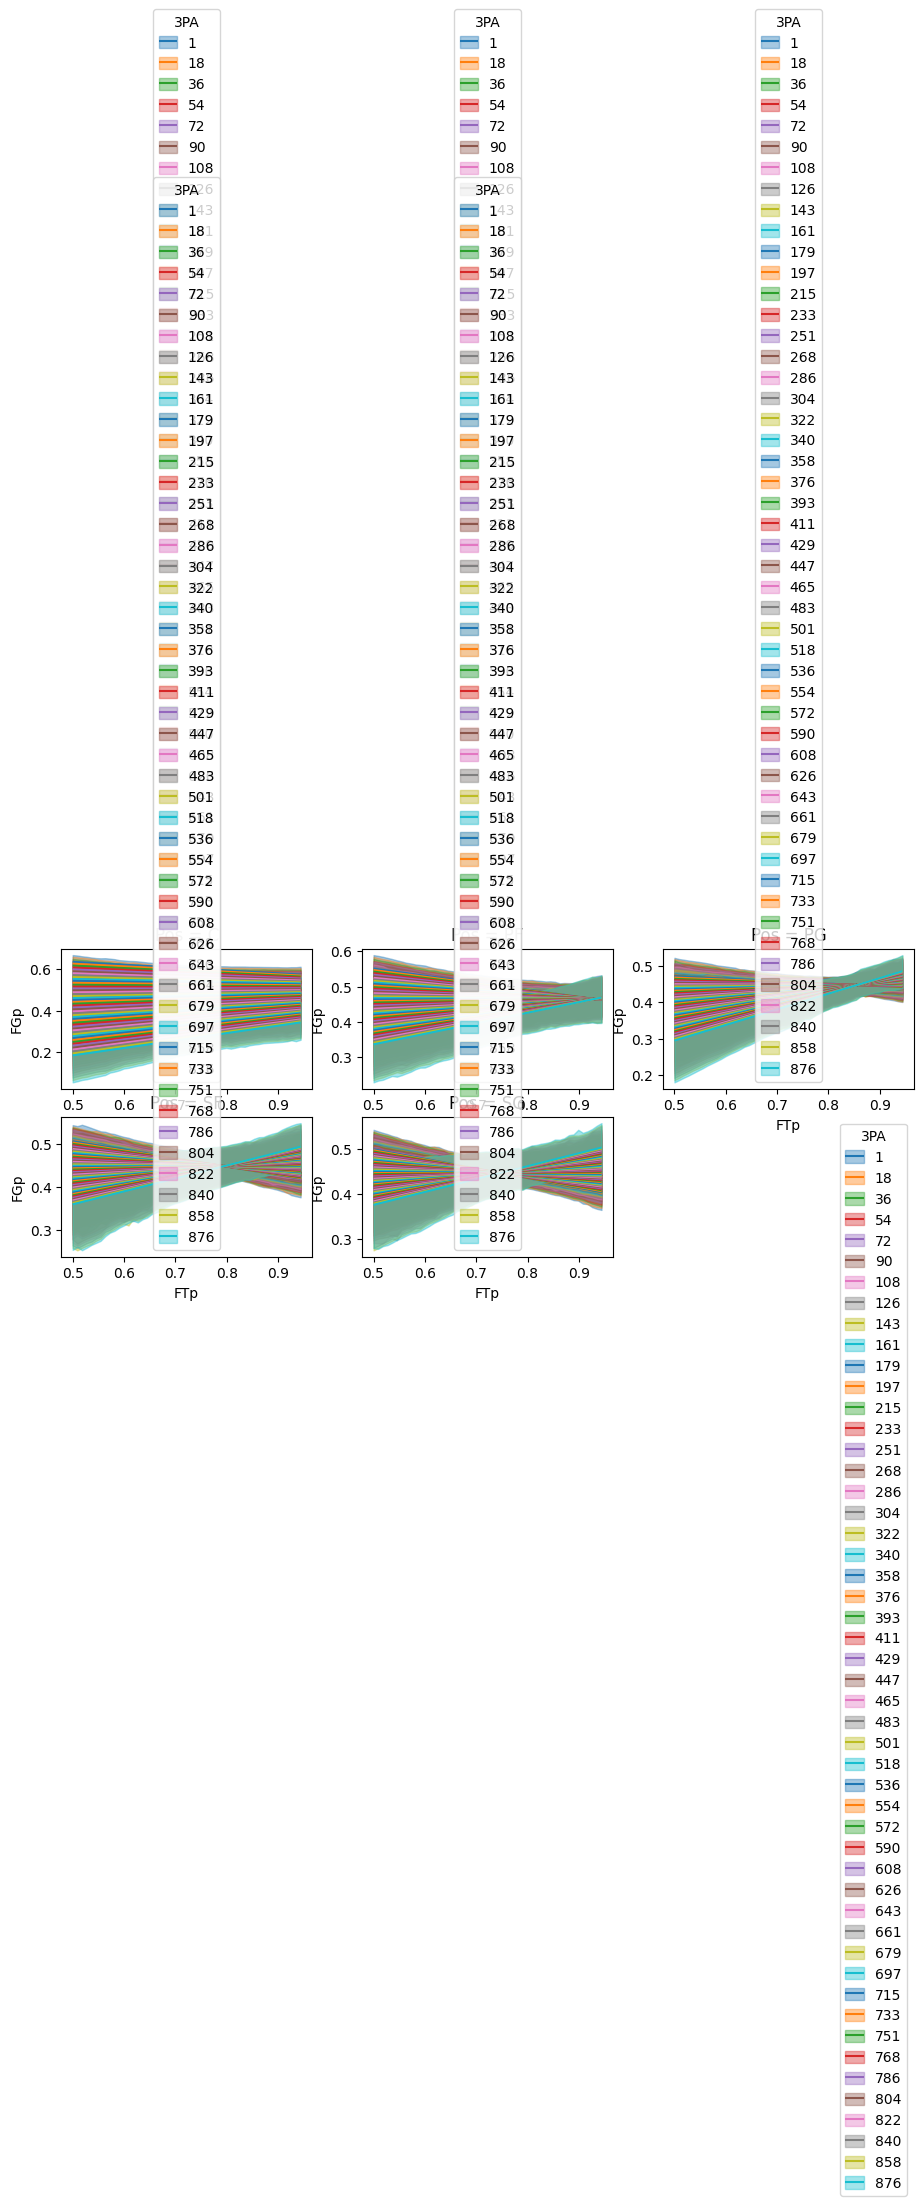

In [ ]:
bmb.interpret.plot_predictions(model_bb_inter2,
                               idata_bb_inter2,
                               ["FTp","3PA","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

In [ ]:
model_bb_inter3 = bmb.Model("`FGp` ~ `FTp` + Pos + '3PA' + '3PA':'Pos'" , data=bb)
idata_bb_inter3 = model_bb_inter3.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FTp', ylabel='FGp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: xlabel='FTp', ylabel='FGp'>]], dtype=object))

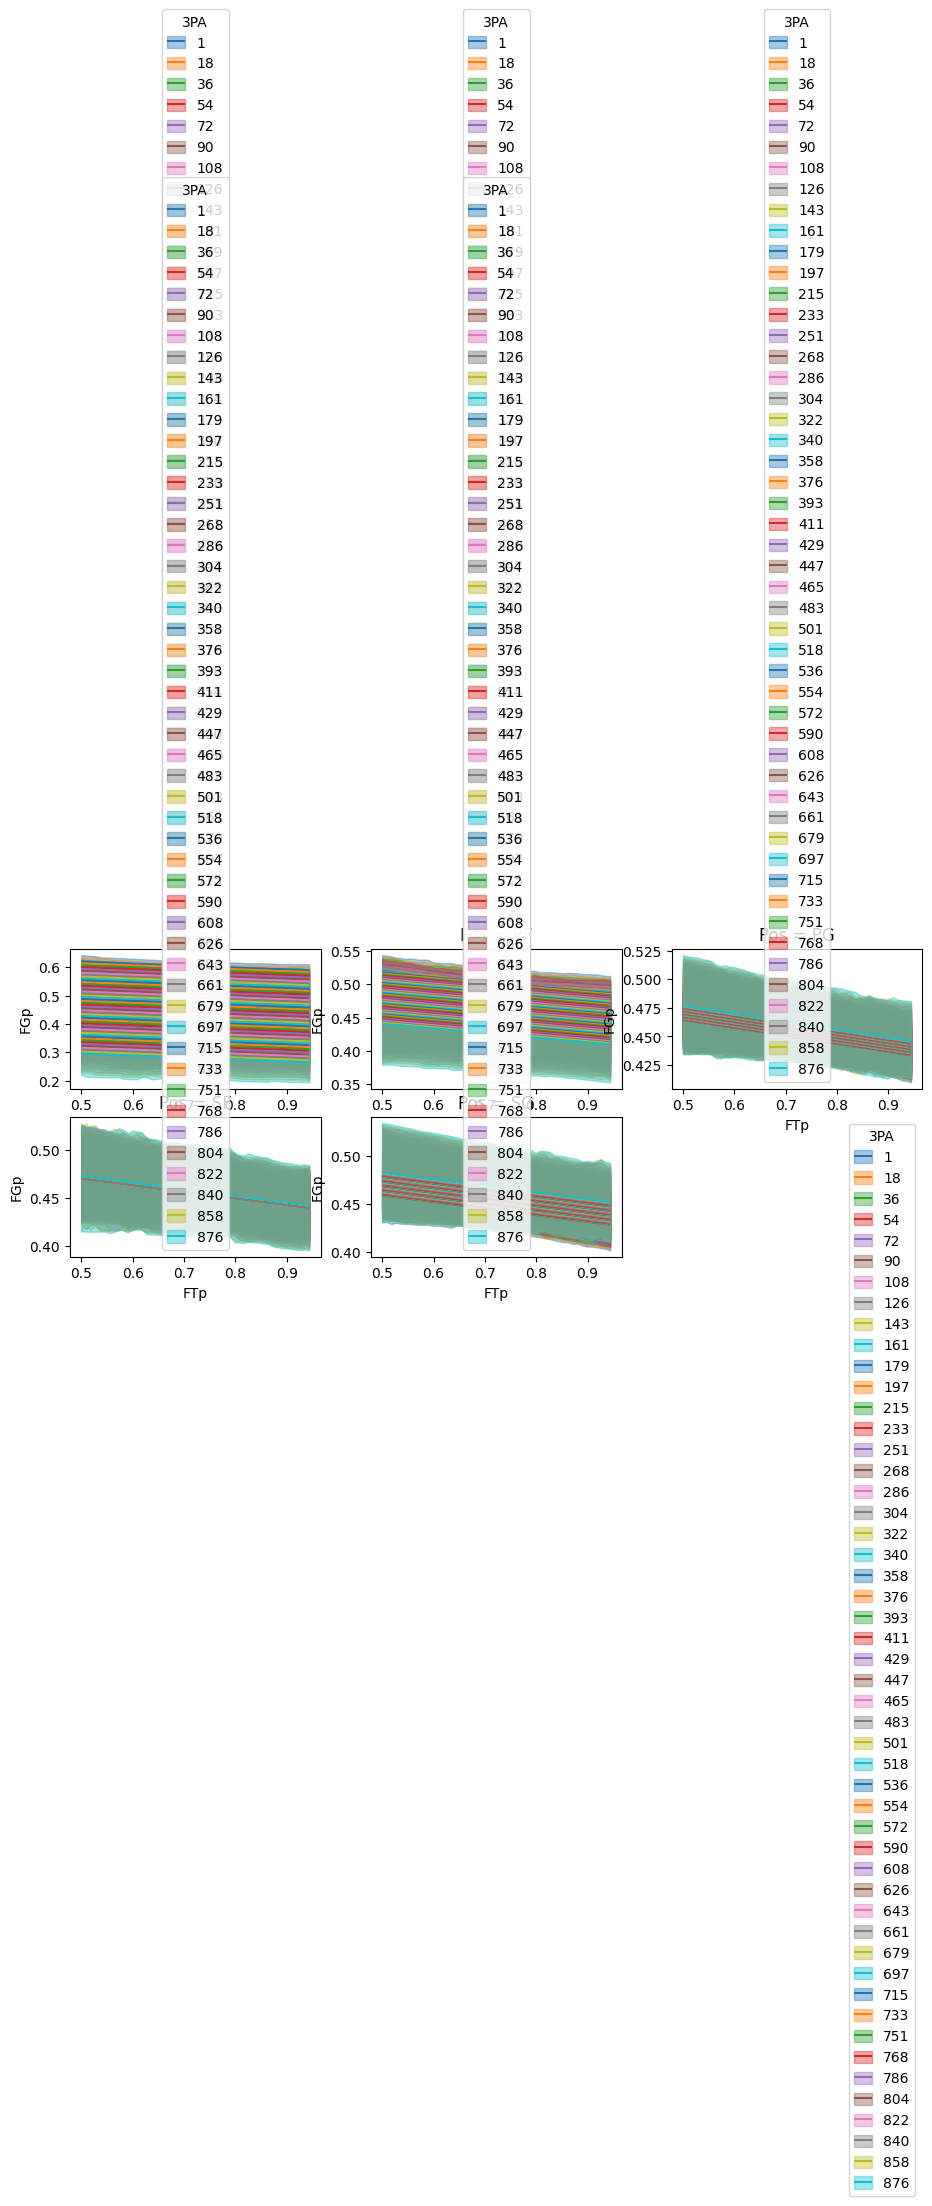

In [ ]:
bmb.interpret.plot_predictions(model_bb_inter3,
                               idata_bb_inter3,
                               ["FTp","3PA","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

In [ ]:
cmp_df = az.compare( {"model1":idata_bv,"model2":idata_bb_h, "model3":idata_bb_inter1,"model4":idata_bb_inter2, "model5":idata_bb_inter3} )

In [ ]:
cmp_df

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model5,0,529.858352,12.724184,0.000000,5.392166e-01,15.779957,0.000000,False,log
model4,1,529.444629,18.624745,0.413723,4.607834e-01,14.932789,3.697676,False,log
model3,2,509.492218,13.701208,20.366134,4.091501e-16,16.645743,7.611727,False,log
model2,3,508.718074,13.407754,21.140278,1.057898e-15,17.033250,7.092409,False,log
model1,4,507.342706,8.310385,22.515646,0.000000e+00,16.086551,6.793900,False,log


**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

According to this metric, model 5 is the best one, because it has highest elpd_loo score, and it has less comparrison meaning its not overfitting as much as model 4.